In [1]:
#data handling, model creation/evaluation
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn import metrics
import scipy.stats as stats
import pingouin as pg
from scipy.stats import f_oneway

# visualisation
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\User\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\User\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# read data into a DataFrame
covid19 = pd.read_csv("../data/pfizer_biontech.csv")
print(covid19.dtypes)
print(covid19.head())
print(covid19.shape)

Sample_ID             int64
Drug                 object
Covid19_variants     object
IC50  (ug/mL)       float64
Country              object
dtype: object
   Sample_ID       Drug Covid19_variants  IC50  (ug/mL)         Country
0          1  REGN10933          B.1.1.7          0.014  United Kingdom
1          2  REGN10933          B.1.1.7          0.015  United Kingdom
2          3  REGN10933          B.1.1.7          0.015  United Kingdom
3          4  REGN10933          B.1.1.7          0.013  United Kingdom
4          5  REGN10933          B.1.1.7          0.013  United Kingdom
(128, 5)


In [3]:
print(covid19)

     Sample_ID       Drug Covid19_variants  IC50  (ug/mL)         Country
0            1  REGN10933          B.1.1.7          0.014  United Kingdom
1            2  REGN10933          B.1.1.7          0.015  United Kingdom
2            3  REGN10933          B.1.1.7          0.015  United Kingdom
3            4  REGN10933          B.1.1.7          0.013  United Kingdom
4            5  REGN10933          B.1.1.7          0.013  United Kingdom
..         ...        ...              ...            ...             ...
123        124    AZD1061              P.1          9.301          Brazil
124        125    AZD1061              P.1          9.270          Brazil
125        126    AZD1061              P.1         10.290          Brazil
126        127    AZD1061              P.1          7.285          Brazil
127        128    AZD1061              P.1          9.108          Brazil

[128 rows x 5 columns]


In [4]:
covid19.describe()
covid19.groupby(["Covid19_variants","Drug", "Country"]).mean()
covid19.groupby(["Covid19_variants","Drug", "Country"]).std()

Sample_ID  IC50  (ug/mL)
Covid19_variants Drug      Country                                 
B.1.1.7          AZD1061   United Kingdom   2.449490       0.002850
                 AZD8895   United Kingdom   2.449490       0.002375
                 REGN10933 United Kingdom   2.449490       0.001126
                 REGN10987 United Kingdom   2.449490       0.002900
B.1.351          AZD1061   South Africa     2.449490       0.002053
                 AZD8895   South Africa     2.449490       0.028755
                 REGN10933 South Africa     2.449490       1.650071
                 REGN10987 South Africa     2.449490       0.001061
P.1              AZD1061   Brazil           2.449490       1.179309
                 AZD8895   Brazil           2.449490       0.684407
                 REGN10933 Brazil           2.449490       1.817480
                 REGN10987 Brazil           2.449490       0.001246
VIC01            AZD1061   Australia_VIC    2.449490       0.000756
                 AZD8895   Australia_VIC    2.263846       0.002167
                 REGN10933 Australia_VIC    2.449490       0.001604
                 REGN10987 Australia_VIC    2.449490       0.005553

In [5]:
AZD1061 = [0.012, 0.014, 0.015, 0.009, 0.009, 0.013, 0.008, 0.015]
AZD8895 = [0.011, 0.009, 0.01, 0.015, 0.014, 0.011, 0.012, 0.008]
REGN10987 = [0.028, 0.025, 0.026, 0.031, 0.029, 0.033, 0.027, 0.032]
REGN10933 = [0.014, 0.015, 0.015, 0.013, 0.013, 0.014, 0.012, 0.015]
f_oneway(AZD1061,AZD8895,REGN10987,REGN10933)


F_onewayResult(statistic=95.0731150038081, pvalue=8.635635969238984e-15)

In [6]:
oneway_result = (8.635635969238984e-15)

print("One way ANOVA result for COVID19 variant B.1.1.7 against commercial monoclonal antibodies using scipy stats:\n", oneway_result)

One way ANOVA result for COVID19 variant B.1.1.7 against commercial monoclonal antibodies using scipy stats:
 8.635635969238984e-15


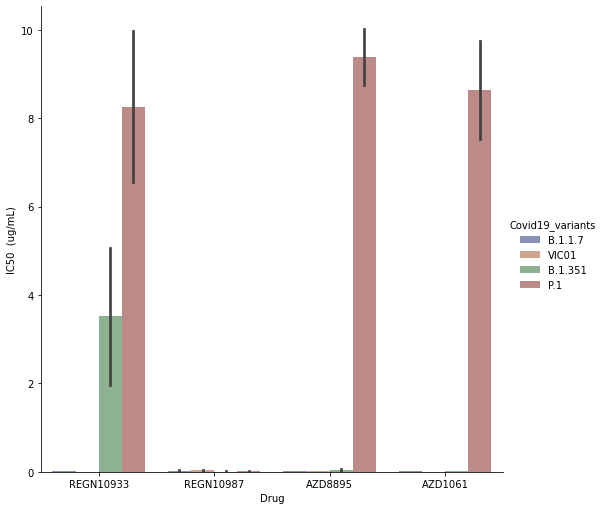

In [7]:
variants = sns.catplot(
    data=covid19, kind="bar",
    x="Drug", y="IC50  (ug/mL)", hue="Covid19_variants", ci= "sd", palette="dark", alpha=.5, height=7)

#variants.legend.set_title("Reduced Neutralisation of SARS-COV-2 by Regeneron and AstraZeneca monoclonal antibodies")

In [8]:
pfizer_12 = (1095.5, 1402.5, 1239.5, 1093.4, 1589.3, 1267.4)
pfizer_25 = (621.4, 800.2, 705.1, 765.3, 802.76, 545.6)
print(pfizer_12)
print(pfizer_25)
print("Neutralisation assay mean titer")
pfizer_12_mean = ((1095.5 + 1402.5 + 1239.5 + 1093.4 + 1589.3 + 1267.4) / 6 )
print(pfizer_12_mean)
pfizer_25_mean = ((621.4 + 800.2 + 705.1 + 765.3 + 802.76 +545.6) / 6)
print(pfizer_25_mean)
print("GMR = geometric mean ratio, Neutralisation assay mean ratio")
GMR = (pfizer_12_mean / pfizer_25_mean)
print(GMR)


(1095.5, 1402.5, 1239.5, 1093.4, 1589.3, 1267.4)
(621.4, 800.2, 705.1, 765.3, 802.76, 545.6)
Neutralisation assay mean titer
1281.2666666666667
706.7266666666668
GMR = geometric mean ratio, Neutralisation assay mean ratio
1.812959277042515


In [9]:
pfizer = ((1095.5, 1402.5, 1239.5, 1093.4, 1589.3, 1267.4),(621.4, 800.2, 705.1, 765.3, 802.76, 545.6))
bioNtech = np.array(pfizer, dtype = np.float64)
print(bioNtech)
print(bioNtech.shape)
print(bioNtech.mean())
np.sum(bioNtech)# sum of all values 
np.sum(bioNtech, axis = 1) # sum of every row
np.mean(bioNtech, axis = 1) # mean of every row


[[1095.5  1402.5  1239.5  1093.4  1589.3  1267.4 ]
 [ 621.4   800.2   705.1   765.3   802.76  545.6 ]]
(2, 6)
993.9966666666666


array([1281.26666667,  706.72666667])

In [10]:
sars_cov_2 = pd.DataFrame({"Pfizer-BioNTech_12": (1095.5, 1402.5, 1239.5, 1093.4, 1589.3, 1267.4), 
                                "Pfizer-BioNTech_25": (621.4, 800.2, 705.1, 765.3, 802.76, 545.6)})
    
print(sars_cov_2) # You can also use a dictionary of columns to the same effect:
sars_cov_2

   Pfizer-BioNTech_12  Pfizer-BioNTech_25
0              1095.5              621.40
1              1402.5              800.20
2              1239.5              705.10
3              1093.4              765.30
4              1589.3              802.76
5              1267.4              545.60


,Pfizer-BioNTech_12,Pfizer-BioNTech_25
0,1095.5,621.40
1,1402.5,800.20
2,1239.5,705.10
3,1093.4,765.30
4,1589.3,802.76
5,1267.4,545.60


In [11]:
sars_cov_2.mean()

Pfizer-BioNTech_12    1281.266667
Pfizer-BioNTech_25     706.726667
dtype: float64

In [12]:
sars_cov_2.std()

Pfizer-BioNTech_12    190.432105
Pfizer-BioNTech_25    104.532855
dtype: float64

In [13]:
GMR = (1281.266667 / 706.726667)
print("Pfizer_BioNtech Geometric mean titer value = ", GMR)

Pfizer_BioNtech Geometric mean titer value =  1.8129592766590765


In [14]:
covid19

,Sample_ID,Drug,Covid19_variants,IC50 (ug/mL),Country
0,1,REGN10933,B.1.1.7,0.014,United Kingdom
1,2,REGN10933,B.1.1.7,0.015,United Kingdom
2,3,REGN10933,B.1.1.7,0.015,United Kingdom
3,4,REGN10933,B.1.1.7,0.013,United Kingdom
4,5,REGN10933,B.1.1.7,0.013,United Kingdom
...,...,...,...,...,...
123,124,AZD1061,P.1,9.301,Brazil
124,125,AZD1061,P.1,9.270,Brazil
125,126,AZD1061,P.1,10.290,Brazil
126,127,AZD1061,P.1,7.285,Brazil


In [15]:
#check for loading
print(sars_cov_2)

   Pfizer-BioNTech_12  Pfizer-BioNTech_25
0              1095.5              621.40
1              1402.5              800.20
2              1239.5              705.10
3              1093.4              765.30
4              1589.3              802.76
5              1267.4              545.60


In [16]:
print(sars_cov_2.shape)
sars_cov_2.head()

(6, 2)


,Pfizer-BioNTech_12,Pfizer-BioNTech_25
0,1095.5,621.40
1,1402.5,800.20
2,1239.5,705.10
3,1093.4,765.30
4,1589.3,802.76


In [17]:
sars_cov_2.dtypes

Pfizer-BioNTech_12    float64
Pfizer-BioNTech_25    float64
dtype: object

In [18]:
sars_cov_2["Pfizer-BioNTech_12"].describe()


count       6.000000
mean     1281.266667
std       190.432105
min      1093.400000
25%      1131.500000
50%      1253.450000
75%      1368.725000
max      1589.300000
Name: Pfizer-BioNTech_12, dtype: float64

In [19]:
sars_cov_2["Pfizer-BioNTech_25"].describe()

count      6.000000
mean     706.726667
std      104.532855
min      545.600000
25%      642.325000
50%      735.200000
75%      791.475000
max      802.760000
Name: Pfizer-BioNTech_25, dtype: float64

In [20]:
# read data into a DataFrame
BNT162b2 = pd.read_csv("../data/BNT162b2.csv")

In [39]:
print(BNT162b2.shape)

BNT162b2.dtypes

(120, 5)


Sample_ID            int64
Drug                object
Covid19_variants    object
FRNT 50              int64
Country             object
dtype: object

In [40]:
BNT162b2.head()

,Sample_ID,Drug,Covid19_variants,FRNT 50,Country
0,1,convalescent_plasma,B.1.1.7,1647,United Kingdom
1,2,convalescent_plasma,B.1.1.7,1115,United Kingdom
2,3,convalescent_plasma,B.1.1.7,438,United Kingdom
3,4,convalescent_plasma,B.1.1.7,487,United Kingdom
4,5,convalescent_plasma,B.1.1.7,695,United Kingdom


In [22]:
print(BNT162b2)

     Sample_ID                 Drug Covid19_variants  FRNT 50         Country
0            1  convalescent_plasma          B.1.1.7     1647  United Kingdom
1            2  convalescent_plasma          B.1.1.7     1115  United Kingdom
2            3  convalescent_plasma          B.1.1.7      438  United Kingdom
3            4  convalescent_plasma          B.1.1.7      487  United Kingdom
4            5  convalescent_plasma          B.1.1.7      695  United Kingdom
..         ...                  ...              ...      ...             ...
115        116         ChAdOx1_sera        B.1.617.1      975           India
116        117         ChAdOx1_sera        B.1.617.1      953           India
117        118         ChAdOx1_sera        B.1.617.1      958           India
118        119         ChAdOx1_sera        B.1.617.1      901           India
119        120         ChAdOx1_sera        B.1.617.1     1578           India

[120 rows x 5 columns]


In [23]:
BNT162b2.groupby(["Covid19_variants","Drug", "Country"]).mean()

Sample_ID   FRNT 50
Covid19_variants Drug                Country                            
B.1.1.7          BNT162b2_sera       United Kingdom       12.5  1910.125
                 ChAdOx1_sera        United Kingdom       20.5   299.500
                 convalescent_plasma United Kingdom        4.5   820.500
B.1.351          BNT162b2_sera       South Africa         60.5   283.875
                 ChAdOx1_sera        South Africa         68.5    65.250
                 convalescent_plasma South Africa         52.5   317.750
B.1.617.1        BNT162b2_sera       India               108.5  2749.500
                 ChAdOx1_sera        India               116.5  1331.750
                 convalescent_plasma India               100.5   297.500
P.1              BNT162b2_sera       Brazil               84.5   911.125
                 ChAdOx1_sera        Brazil               92.5   387.125
                 convalescent_plasma Brazil               76.5   905.750
VIC01            BNT162b2_sera       Australia_VIC        36.5  2198.375
                 ChAdOx1_sera        Australia_VIC        44.5   387.125
                 convalescent_plasma Australia_VIC        28.5  1535.750

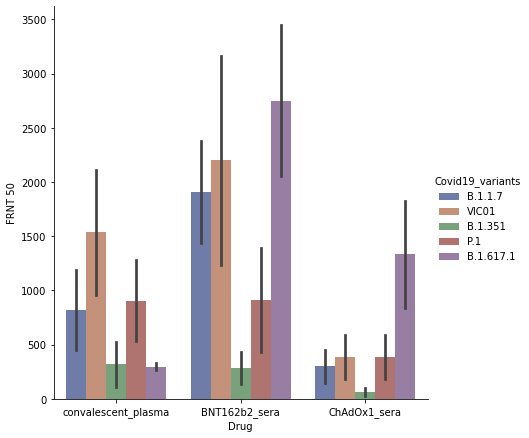

In [24]:
vaccine = sns.catplot(
    data= BNT162b2, kind="bar",
    x="Drug", y="FRNT 50", hue="Covid19_variants", ci= "sd", palette="dark", alpha=.6, height=6)

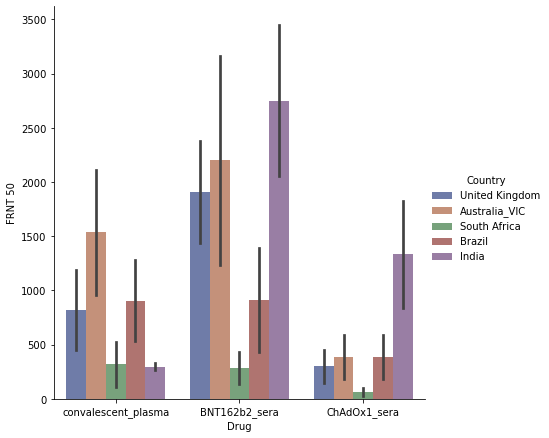

In [25]:
vaccine_1 = sns.catplot(
    data= BNT162b2, kind="bar",
    x="Drug", y="FRNT 50", hue="Country", ci= "sd", palette="dark", alpha=.6, height=6)

In [27]:
vacc = (4322)
vacc_severe = (55)
sav =(vacc_severe/vacc)*100 
BNT = (100 - 1.272)
print("Percentage of severe disease from Covid19 after vaccination = ",sav)
print("BNT162b2 estimated effectiveness in preventing severe disease from Covid19 = ",BNT)

Percentage of severe disease from Covid19 after vaccination =  1.2725590004627487
BNT162b2 estimated effectiveness in preventing severe disease from Covid19 =  98.728


In [28]:
aov_biontech = pg.rm_anova(dv="FRNT 50",
                  within=["Drug", "Covid19_variants"],
                  subject="Sample_ID" , data=BNT162b2)
aov_biontech

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:8525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value enco

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Drug,4.046132e+08,2,238,2.023066e+08,-34.846832,1.000000e+00,NaN,-0.414088,NaN
1,Covid19_variants,3.665755e+08,4,476,9.164389e+07,-28.342532,1.000000e+00,NaN,-0.312633,NaN
2,Drug * Covid19_variants,3.489926e+08,8,952,4.362407e+07,95.978546,8.977075e-117,NaN,0.446456,NaN


In [41]:
aov_biontech = pg.rm_anova(dv="FRNT 50",
                  within=["Drug", "Country"],
                  subject="Sample_ID" , data=BNT162b2)
aov_biontech

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:8525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value enco

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Drug,4.046132e+08,2,238,2.023066e+08,-34.846832,1.000000e+00,NaN,-0.414088,NaN
1,Country,3.665755e+08,4,476,9.164389e+07,-28.342532,1.000000e+00,NaN,-0.312633,NaN
2,Drug * Country,3.489926e+08,8,952,4.362407e+07,95.978546,8.977075e-117,NaN,0.446456,NaN


In [30]:
BNT162b2.head()

,Sample_ID,Drug,Covid19_variants,FRNT 50,Country
0,1,convalescent_plasma,B.1.1.7,1647,United Kingdom
1,2,convalescent_plasma,B.1.1.7,1115,United Kingdom
2,3,convalescent_plasma,B.1.1.7,438,United Kingdom
3,4,convalescent_plasma,B.1.1.7,487,United Kingdom
4,5,convalescent_plasma,B.1.1.7,695,United Kingdom


In [31]:
posthoc_biontech = pg.pairwise_ttests(
                             data=BNT162b2, dv="FRNT 50", subject="Sample_ID",
                             within="Drug", between="Covid19_variants",
                             parametric=True, padjust="holm", effsize="hedges")
posthoc_biontech



,Contrast,Drug,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Drug,-,BNT162b2_sera,ChAdOx1_sera,True,True,7.898530,39.0,two-sided,1.293584e-09,3.880753e-09,holm,8.91e+06,1.291053
1,Drug,-,BNT162b2_sera,convalescent_plasma,True,True,4.312397,39.0,two-sided,1.064388e-04,2.128775e-04,holm,229.737,0.939944
2,Drug,-,ChAdOx1_sera,convalescent_plasma,True,True,-2.082616,39.0,two-sided,4.389226e-02,4.389226e-02,holm,1.188,-0.503582
3,Covid19_variants,-,B.1.1.7,B.1.351,False,True,4.830548,46.0,two-sided,1.548690e-05,1.084083e-04,holm,1118.568,1.371599
4,Covid19_variants,-,B.1.1.7,B.1.617.1,False,True,-1.594152,46.0,two-sided,1.177508e-01,4.710032e-01,holm,0.801,-0.452648
5,Covid19_variants,-,B.1.1.7,P.1,False,True,1.501934,46.0,two-sided,1.399482e-01,4.710032e-01,holm,0.715,0.426463
6,Covid19_variants,-,B.1.1.7,VIC01,False,True,-1.392653,46.0,two-sided,1.704199e-01,4.710032e-01,holm,0.63,-0.395434
7,Covid19_variants,-,B.1.351,B.1.617.1,False,True,-5.229215,46.0,two-sided,4.057730e-06,3.651957e-05,holm,3675.174,-1.484798
8,Covid19_variants,-,B.1.351,P.1,False,True,-5.103306,46.0,two-sided,6.210019e-06,4.968015e-05,holm,2514.48,-1.449047
9,Covid19_variants,-,B.1.351,VIC01,False,True,-5.448048,46.0,two-sided,1.927885e-06,1.927885e-05,holm,7160.692,-1.546934


In [32]:
posthoc_biontech = pg.pairwise_ttests(
                             data=BNT162b2, dv="FRNT 50", subject="Sample_ID",
                             within="Country", between="Drug",
                             parametric=True, padjust="holm", effsize="hedges")
posthoc_biontech

,Contrast,Country,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Country,-,Australia_VIC,Brazil,True,True,3.338563,23.0,two-sided,2.852360e-03,1.711416e-02,holm,14.095,0.798136
1,Country,-,Australia_VIC,India,True,True,-0.318374,23.0,two-sided,7.530744e-01,7.530744e-01,holm,0.225,-0.078013
2,Country,-,Australia_VIC,South Africa,True,True,5.851967,23.0,two-sided,5.790900e-06,5.211810e-05,holm,3573.908,1.546934
3,Country,-,Australia_VIC,United Kingdom,True,True,2.150158,23.0,two-sided,4.229057e-02,1.268717e-01,holm,1.485,0.395434
4,Country,-,Brazil,India,True,True,-2.977453,23.0,two-sided,6.737305e-03,3.368653e-02,holm,6.757,-0.820020
5,Country,-,Brazil,South Africa,True,True,6.785422,23.0,two-sided,6.398738e-07,6.398738e-06,holm,2.701e+04,1.449047
6,Country,-,Brazil,United Kingdom,True,True,-1.792270,23.0,two-sided,8.625538e-02,1.725108e-01,holm,0.853,-0.426463
7,Country,-,India,South Africa,True,True,5.223844,23.0,two-sided,2.681797e-05,1.877258e-04,holm,886.347,1.484798
8,Country,-,India,United Kingdom,True,True,2.428214,23.0,two-sided,2.340347e-02,9.361387e-02,holm,2.393,0.452648
9,Country,-,South Africa,United Kingdom,True,True,-5.399859,23.0,two-sided,1.739570e-05,1.391656e-04,holm,1312.382,-1.371599


In [34]:
# read data into a DataFrame
BNT162b2_1d = pd.read_csv("../data/BNT162b2_1d.csv")

In [35]:
BNT162b2_1d.head()

,Sample_ID,Drug,Covid19_variants,FRNT 50,Country,Drug_dummies,Covid19_dummies
0,1,convalescent_plasma,B.1.1.7,1647,United Kingdom,1647,1
1,2,convalescent_plasma,B.1.1.7,1115,United Kingdom,1115,1
2,3,convalescent_plasma,B.1.1.7,438,United Kingdom,438,1
3,4,convalescent_plasma,B.1.1.7,487,United Kingdom,487,1
4,5,convalescent_plasma,B.1.1.7,695,United Kingdom,695,1


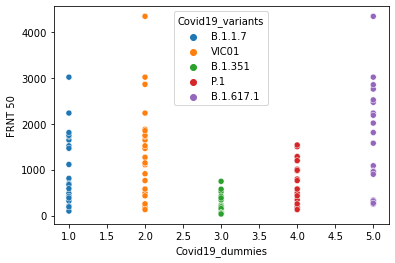

In [36]:
sns.scatterplot(data=BNT162b2_1d, x="Covid19_dummies", y="FRNT 50", hue = "Covid19_variants")
plt.show()

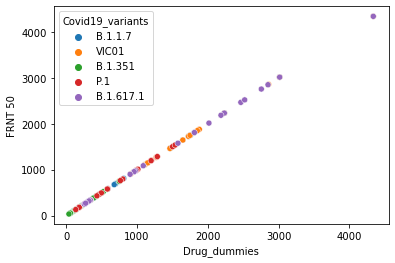

In [37]:
sns.scatterplot(data=BNT162b2_1d, x="Drug_dummies", y="FRNT 50", hue = "Covid19_variants", legend="full")
plt.show()

In [ ]:


# Pandas wants the MultiIndex values as tuples, not nested dicts. The simplest thing is to convert your dictionary to the right format before trying to pass it to DataFrame:

reform = {(outerKey, innerKey): values for outerKey, innerDict in dictionary.iteritems() for innerKey, values in innerDict.iteritems()}
reform {('A', 'a'): [1, 2, 3, 4, 5],
 ('A', 'b'): [6, 7, 8, 9, 1],
 ('B', 'a'): [2, 3, 4, 5, 6],
 ('B', 'b'): [7, 8, 9, 1, 2]}

 pandas.DataFrame(reform)
   A     B   
   a  b  a  b
0  1  6  2  7
1  2  7  3  8
2  3  8  4  9
3  4  9  5  1
4  5  1  6  2

